In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from toolbox_02450 import clusterplot 

# Loading the data

In [3]:
df = pd.Series()
df['raw'] = pd.read_csv('./data/clean.csv',index_col=0)
df['raw'].head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_label
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,Good
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,Good
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,Very good
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,Good
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,0,Good


In [4]:
df['num'] = df['raw']._get_numeric_data()
df['std'] = (df['num'] - df['num'].mean()) / (df['num'].max() - df['num'].min())

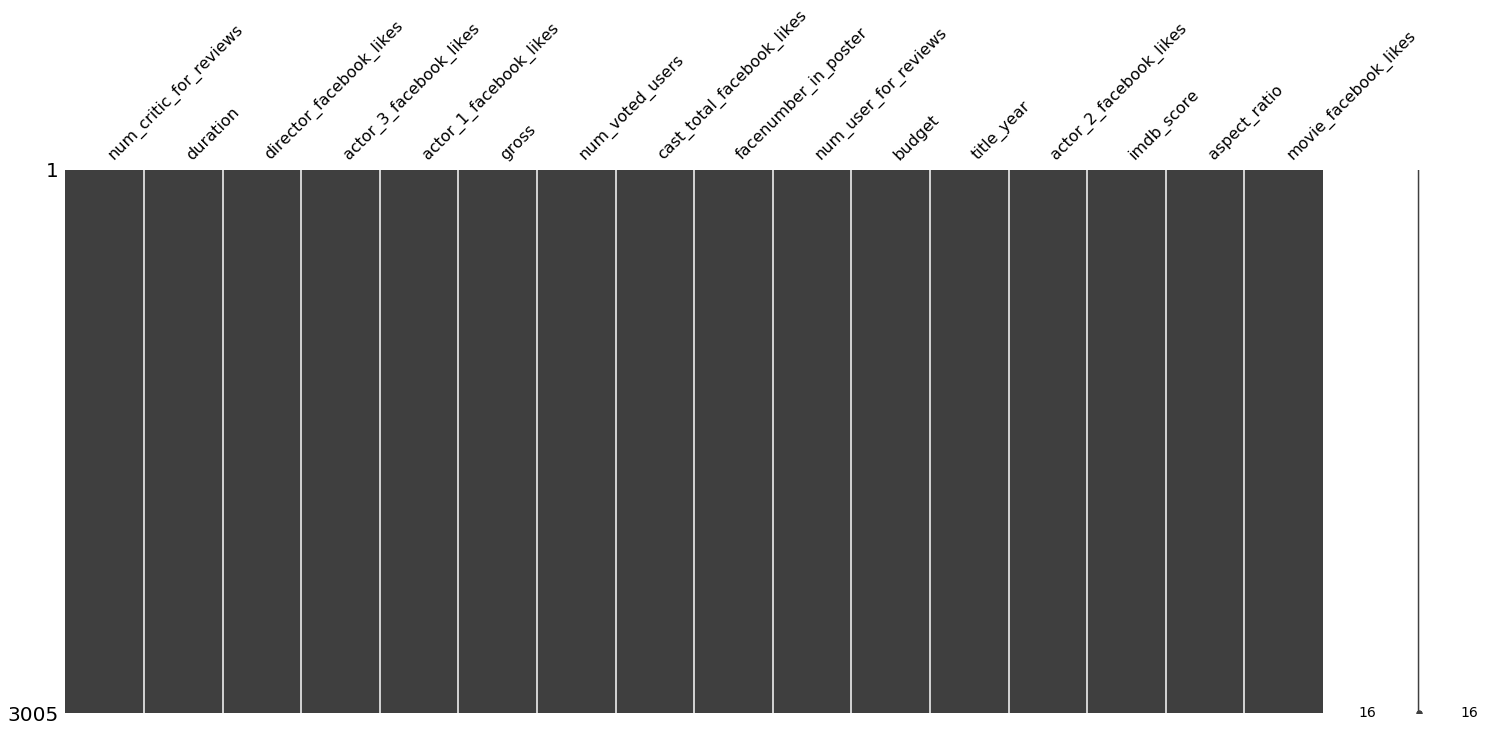

# clustering

In [5]:
#X = df['raw']
#X = df['raw'].iloc[:, df['raw'].columns != 'imdb_score_label'].as_matrix()
X = df['std'].as_matrix()
#X = df['raw']['imdb_score'].as_matrix().reshape(3005,1)
y = df['raw']['imdb_score_label'].as_matrix()

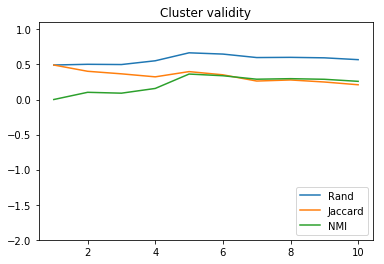

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import k_means
from toolbox_02450 import clusterval

N, M = X.shape

# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K,))
Jaccard = np.zeros((K,))
NMI = np.zeros((K,))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X,k+1)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

plt.figure(1)
plt.title('Cluster validity')
plt.plot(np.arange(K)+1, Rand)
plt.plot(np.arange(K)+1, Jaccard)
plt.plot(np.arange(K)+1, NMI)
plt.ylim(-2,1.1)
plt.legend(['Rand', 'Jaccard', 'NMI'], loc=4)
plt.show()


Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10
Fitting model for K=11
Fitting model for K=12
Fitting model for K=13
Fitting model for K=14


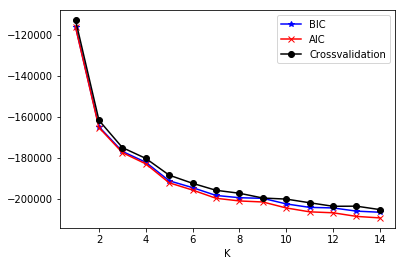

In [8]:
from sklearn.mixture import GaussianMixture
from sklearn import model_selection

# Load Matlab data file and extract variables of interest
N, M = X.shape


# Range of K's to try
KRange = range(1,15)
T = len(KRange)

covar_type = 'diag'     # you can try out 'diag' as well
reps = 3                # number of fits with different initalizations, best result will be kept

# Allocate variables
BIC = np.zeros((T,))
AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X)

        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
        AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score_samples(X_test).sum()
            

# Plot results

plt.figure(1); 
plt.plot(KRange, BIC,'-*b')
plt.plot(KRange, AIC,'-xr')
plt.plot(KRange, 2*CVE,'-ok')
plt.legend(['BIC', 'AIC', 'Crossvalidation'])
plt.xlabel('K')
plt.show()




We will chose 14 as this is the value with the lowest negative log likelyhood. 

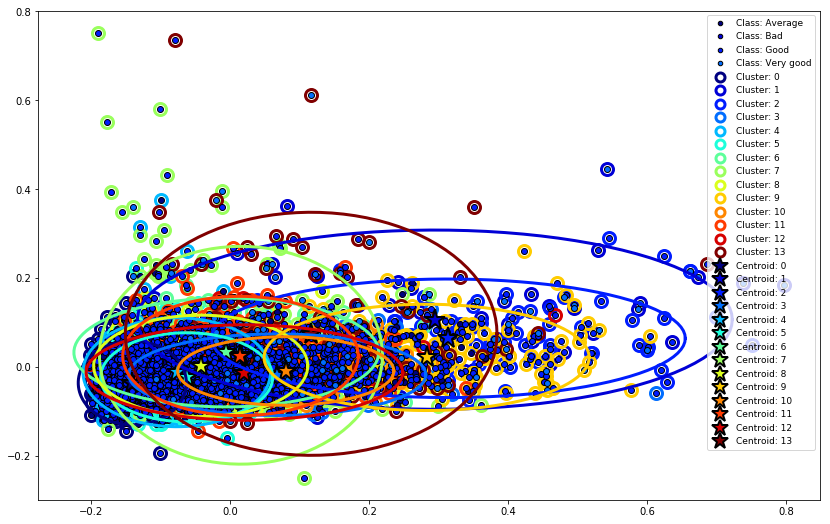

In [25]:
from sklearn.mixture import GaussianMixture


N, M = X.shape
# Number of clusters
K = 14
cov_type = 'diag'       
# type of covariance, you can try out 'diag' as well
reps = 3                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X)

cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type == 'diag':    
    new_covs = np.zeros([K,M,M])    

count = 0    
for elem in covs:        
    temp_m = np.zeros([M,M])        
    for i in range(len(elem)):            
        temp_m[i][i] = elem[i]        
    
    new_covs[count] = temp_m        
    count += 1
        
covs = new_covs
# Plot results:

#plt.figure(figsize=(14,9))
#clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
#plt.show()



plt.figure(figsize=(14,9));
idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx]);
plt.show();

It seems like all centers lie within the elipse of another cluster. This could indicate that there are no major differences between each cluster. Furthermore, all datapoints seem to lie very close together, making it hard to do a meaningfull cluster on the data.

In [26]:
df['pred'] = df['raw']
df['pred']['Cluster'] = cls

In [27]:
print('############## Clusters ##############')
for i in range(K):
    mean = df['pred'][df['pred']['Cluster'].isin({i})]['imdb_score'].mean()
    print('Cluster {} has a mean imdb_score of: {:.2f}'.format(i,mean))
    
print('\n\n############## Our labels ##############')
labels = ['Bad','Average','Good','Very good']
for label in labels:
    mean = df['pred'][df['pred']['imdb_score_label'].isin({label})]['imdb_score'].mean()
    print('Label "{}" has a mean imdb_score of: {:.2f}'.format(label,mean))

############## Clusters ##############
Cluster 0 has a mean imdb_score of: 5.86
Cluster 1 has a mean imdb_score of: 7.81
Cluster 2 has a mean imdb_score of: 6.98
Cluster 3 has a mean imdb_score of: 6.29
Cluster 4 has a mean imdb_score of: 6.14
Cluster 5 has a mean imdb_score of: 5.89
Cluster 6 has a mean imdb_score of: 7.03
Cluster 7 has a mean imdb_score of: 6.91
Cluster 8 has a mean imdb_score of: 6.48
Cluster 9 has a mean imdb_score of: 6.94
Cluster 10 has a mean imdb_score of: 6.40
Cluster 11 has a mean imdb_score of: 6.90
Cluster 12 has a mean imdb_score of: 6.27
Cluster 13 has a mean imdb_score of: 7.65


############## Our labels ##############
Label "Bad" has a mean imdb_score of: 3.25
Label "Average" has a mean imdb_score of: 5.39
Label "Good" has a mean imdb_score of: 6.88
Label "Very good" has a mean imdb_score of: 8.36


We see some clusters has a higher mean imdb_score than others. The variance is far smaller than in our reference clusters.

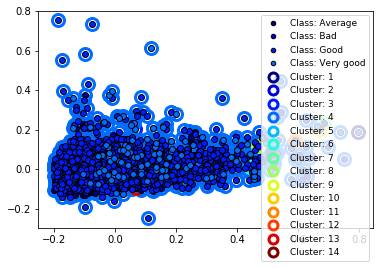

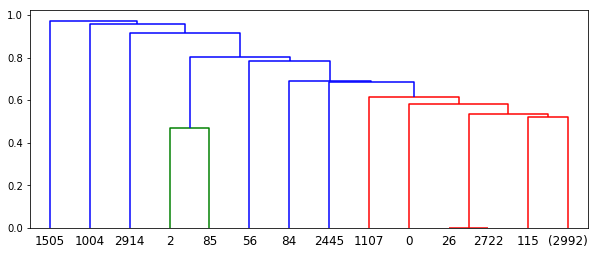

In [40]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#X = df['raw']['']


# Perform hierarchical/agglomerative clustering on data matrix
Method = 'single'
Metric = 'euclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 14
cls = fcluster(Z, criterion='maxclust', t=Maxclust)
plt.figure(1)
clusterplot(X, cls.reshape(cls.shape[0],1), y=y)

# Display dendrogram
max_display_levels=10
plt.figure(2,figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=max_display_levels)
#plt.axhline(0.6, color='g', linestyle='dashed')
#plt.legend(['BIC', 'AIC', 'Crossvalidation'])
plt.show()

In [39]:
df['raw'].iloc[[26,2722]]

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_score_label,Cluster
33,451.0,108.0,13000.0,11000.0,40000.0,334185206.0,306320,79957,0.0,736.0,200000000.0,2010.0,25000.0,6.5,1.85,24000,Good,2
4128,451.0,108.0,13000.0,11000.0,40000.0,334185206.0,306336,79957,0.0,736.0,200000000.0,2010.0,25000.0,6.5,1.85,24000,Good,2


By looking at the dendogram, we see that there is a large difference between most points. There is one very similar cluster, which contains the entry 26 and 2722, but further investegation shows that this is a duplicate.

In [37]:
df['pred'] = df['raw']
df['pred']['Cluster'] = cls

print('############## Clusters ##############')
for i in range(K):
    mean = df['pred'][df['pred']['Cluster'].isin({i+1})]['imdb_score'].mean()
    print('Cluster {} has a mean imdb_score of: {:.2f}'.format(i+1,mean))
    
print('\n\n############## Our labels ##############')
labels = ['Bad','Average','Good','Very good']
for label in labels:
    mean = df['pred'][df['pred']['imdb_score_label'].isin({label})]['imdb_score'].mean()
    print('Label "{}" has a mean imdb_score of: {:.2f}'.format(label,mean))

############## Clusters ##############
Cluster 1 has a mean imdb_score of: 8.65
Cluster 2 has a mean imdb_score of: 6.50
Cluster 3 has a mean imdb_score of: 8.40
Cluster 4 has a mean imdb_score of: 6.38
Cluster 5 has a mean imdb_score of: 8.50
Cluster 6 has a mean imdb_score of: 6.20
Cluster 7 has a mean imdb_score of: 7.90
Cluster 8 has a mean imdb_score of: 7.10
Cluster 9 has a mean imdb_score of: 7.70
Cluster 10 has a mean imdb_score of: 8.60
Cluster 11 has a mean imdb_score of: 9.00
Cluster 12 has a mean imdb_score of: 6.80
Cluster 13 has a mean imdb_score of: 5.20
Cluster 14 has a mean imdb_score of: 7.20


############## Our labels ##############
Label "Bad" has a mean imdb_score of: 3.25
Label "Average" has a mean imdb_score of: 5.39
Label "Good" has a mean imdb_score of: 6.88
Label "Very good" has a mean imdb_score of: 8.36


We see some clusters has a higher mean imdb_score than others. The variance is far smaller than in our reference clusters.